Original distance 2069


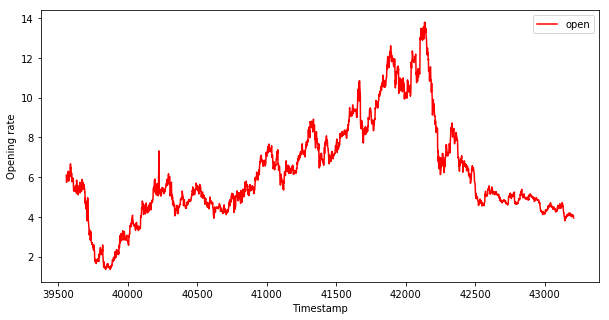

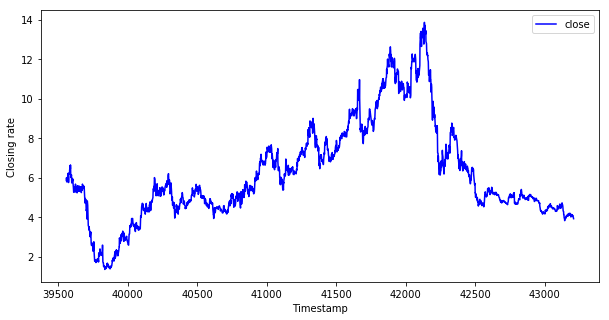

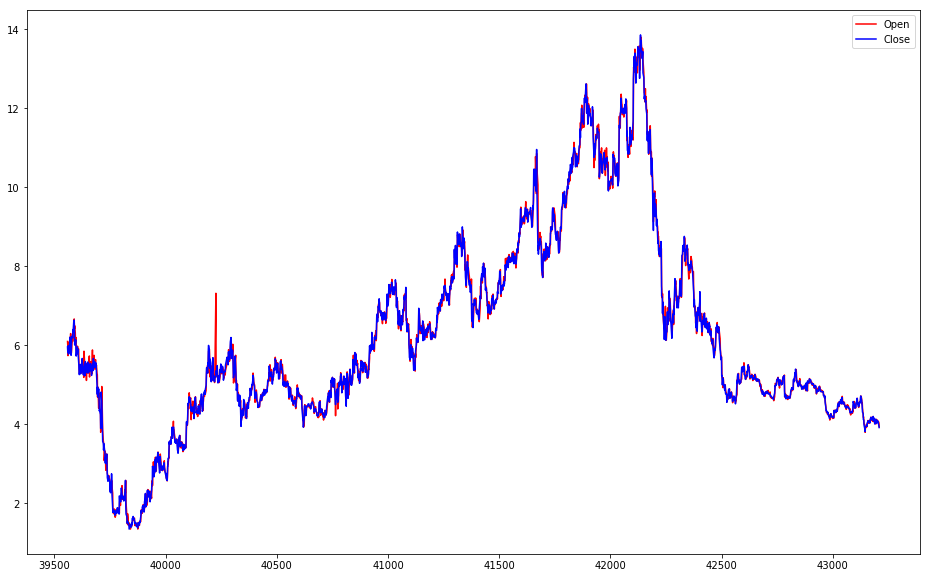

738
538
384
283
211
167
128
99
78
61


In [1]:
# 0992.HK Lenovo Group Limited

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from editdistance import eval


data = pd.read_csv('C://Users/sinneu/Documents/15. Time Series Segmentation/0992HK.csv')
global a, b

# copy the data columns needed
data1 = data['Open'].copy()
data2 = data['Close'].copy()
Timestamp = data['Date'].copy()
distance1 = eval(data1, data2)
print("Original distance",distance1)


'''path = dtw.warping_path(data1, data2, window=4)
print("The path is: ",path)
dtwvis.plot_warping(data1, data2, path, filename="warp.png")
distance = dtw.distance(data1, data2)
print("The distance is: ",distance)
'''

# plot for one attribute
plt.figure(figsize=(10, 5))
plt.plot(Timestamp, data1, 'r', label="open")
plt.legend(loc='best')
plt.axis('tight')
plt.xlabel('Timestamp')
plt.ylabel('Opening rate')
plt.show()

# plot for another attribute
plt.figure(figsize=(10, 5))
plt.plot(Timestamp, data2, 'b', label="close")
plt.legend(loc='best')
plt.axis('tight')
plt.xlabel('Timestamp')
plt.ylabel('Closing rate')
plt.show()


# function definitions
def first_tps(p):
    tp = []
    for i in range(1, len(p) - 1):
        if ((p[i] < p[i + 1]) and (p[i] < p[i - 1])) or ((p[i] > p[i + 1]) and (p[i] > p[i - 1])):
            tp.append(i)
    return tp


def contains_point_in_uptrend(i, p):
    if (p[i] < p[i + 1]) and (p[i] < p[i + 2]) and (p[i + 1] < p[i + 3]) and (p[i + 2] < p[i + 3]) and (
        abs(p[i + 1] - p[i + 2]) < abs(p[i] - p[i + 2]) + abs(p[i + 1] - p[i + 3])):
        return True
    else:
        return False


def contains_point_in_downtrend(i, p):
    if (p[i] > p[i + 1]) and (p[i] > p[i + 2]) and (p[i + 1] > p[i + 3]) and (p[i + 2] > p[i + 3]) and (
        abs(p[i + 2] - p[i + 1]) < abs(p[i] - p[i + 2]) + abs(p[i + 1] - p[i + 3])):
        return True
    else:
        return False


def points_in_the_same_trend(i, p, thr):
    if (abs(p[i] / p[i + 2] - 1) < thr) and (abs(p[i + 1] / p[i + 3] - 1) < thr):
        return True
    else:
        return False


def turning_points(idx, p, thr):
    i = 0
    tp = []
    while (i < len(idx) - 3):
        if contains_point_in_downtrend(idx[i], p) or contains_point_in_uptrend(idx[i], p) or points_in_the_same_trend(
                idx[i], p, thr):
            tp.extend([idx[i], idx[i + 3]])
            i += 3
        else:
            tp.append(idx[i])
            i += 1
    return tp


# define a threshold and separator
thr = 0.05
sep = 10

p1 = data1.values
p2 = data2.values
tp1 = first_tps(p1)
tp2 = first_tps(p2)

# plot both attributes together
plt.figure(figsize=(16, 10))
plt.plot(Timestamp, data1, 'r', label="Open")
plt.plot(Timestamp, data2, 'b', label="Close")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10, 5))
# segment one series


for k in range(1, 11):
    tp1 = turning_points(tp1, p1, thr)
    a = tp1
    tp2 = turning_points(tp2, p2, thr)
    b = tp2
    distance1 = eval(a, b)
    print(distance1)

